# Project: Data Analysis of Medical Appointment No Show

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is a data analysis of Medical Appointment No Show in Brazil. The dataset consists of 110527 number of observations and 14 number of variables. In this project, we will try to find out what are chances of a patient not showing up when he/she has made an doctors appointment and what factors affect a patient not showing up to an appoitnment.

Questions asked while conducting this analysis:

1. Which age group is more likely to not show up for an apointment?
    
2. which gender is not likely to show up?

3. If a patient is enrolled in Bosla Famila program are they more likely to show up?

4. Are the patients who received SMS reminders more likely to show up?


In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Load data
df = pd.read_csv('no-show_appointment_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
# replace uppercase letters of all columns to lowercase
df.columns = map(str.lower, df.columns)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [5]:
# rename incorrectly spelled words
df.rename(columns = {'hipertension' : 'hypertension', 'handcap' : 'handicap'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This dataset does not contain any missing values

In [7]:
sum(df.duplicated())

0

This dataset does not contain any duplicate values

In [8]:
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We see that age column has a negative value, so we will take care of it in Data Cleaning part

##### Since patientid and appointmentid are not target or depentdent variables we can drop them

In [9]:
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Data Cleaning


In [10]:
df.dtypes

gender            object
scheduledday      object
appointmentday    object
age                int64
neighbourhood     object
scholarship        int64
hypertension       int64
diabetes           int64
alcoholism         int64
handicap           int64
sms_received       int64
no-show           object
dtype: object

We see that scheduleday and appointmentday is not in proper datetime format

Convert scheduleday and appointmentday datatype to datetime format

In [11]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [12]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


lets fetch the age with value less than 0

In [13]:
df[df['age'] < 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


So only 1 row has a value less than zero so we can drop it

In [14]:
df.drop(df[df['age'] < 0].index, inplace=True)

In [15]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Since the data has no other inconsistency we can proceed to Data visualtion

<a id='eda'></a>
## Exploratory Data Analysis


### AGE VS NO SHOW

In [16]:
#create mask 
no_show = df['no-show'] == 'Yes'
show = df['no-show'] == 'No'

In [17]:
df.groupby('no-show')['age'].mean()

no-show
No     37.790504
Yes    34.317667
Name: age, dtype: float64

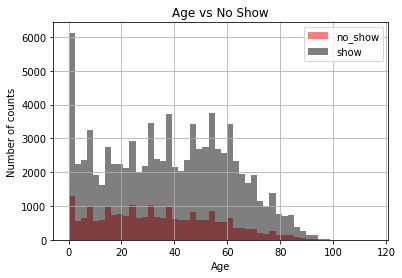

In [18]:
df.age[no_show].hist(label = 'no_show', alpha = 0.5, bins = 50, color = 'red')
df.age[show].hist(label = 'show', alpha = 0.5, bins =50, color = 'black')
plt.xlabel('Age')
plt.ylabel('Number of counts')
plt.title('Age vs No Show')
plt.legend();

 There are higher number of patients that shows up already, so lets see the trends and patterns associated with age

In [19]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
df.describe().age 

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [20]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 0, 20, 40, 60, 80, 115]

In [21]:
# Labels for the five age groups
bin_names = [ '<20', '20-39', '40-59', '60-79', '>=80']

In [22]:
# Creates age_groups column
df['age_groups'] = pd.cut(df['age'], bin_edges, labels=bin_names)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,age_groups
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60-79
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,40-59
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,60-79
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,<20
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,40-59


In [23]:
# get counts for each age groups
age_group_counts = df.groupby(['age_groups', 'no-show']).count()['age']
age_group_counts

age_groups  no-show
<20         No         21852
            Yes         6457
20-39       No         22209
            Yes         6626
40-59       No         24490
            Yes         5591
60-79       No         14373
            Yes         2537
>=80        No          2383
            Yes          469
Name: age, dtype: int64

In [24]:
# get proportions of patients that showed up according to age - by dividing age groups counts by total # of age groups
below_twenty = age_group_counts['<20', 'No'] / df['age_groups'].value_counts()['<20']
twenty_to_thirty_nine = age_group_counts['20-39', 'No'] / df['age_groups'].value_counts()['20-39']
forty_to_fifty_nine = age_group_counts['40-59', 'No'] / df['age_groups'].value_counts()['40-59']
sixty_to_seventy_nine = age_group_counts['60-79', 'No'] / df['age_groups'].value_counts()['60-79']
eighty_and_above = age_group_counts['>=80', 'No'] / df['age_groups'].value_counts()['>=80']

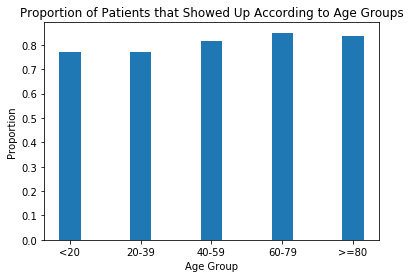

In [25]:
#plot bars
proportions = [below_twenty, twenty_to_thirty_nine, forty_to_fifty_nine, sixty_to_seventy_nine, eighty_and_above]
plt.bar([1, 2, 3, 4, 5], proportions, width=0.3)
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks([1, 2, 3, 4, 5], ['<20', '20-39', '40-59', '60-79', '>=80'])
plt.title('Proportion of Patients that Showed Up According to Age Groups');

The above bar chart shows that higher the age of the patient higher are the chances of them showing up for an appoitnment

### GENDER VS NO SHOW

In [26]:
df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

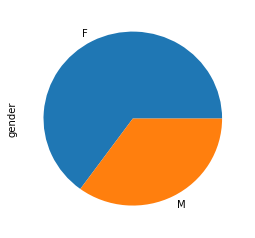

In [27]:
df['gender'].value_counts().plot(kind='pie', figsize=(4,4));

There are more number of females who make an appoitnment than males

So lets see which gender has more chances of not showing up for an appoitnment

In [28]:
# get counts for each gender
gender_counts = df.groupby(['gender', 'no-show']).count()['age']
gender_counts

gender  no-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: age, dtype: int64

In [29]:
# get proportions of patients that showed up according to gender - by dividing gender counts by total # of gender
female_showed_up = gender_counts['F', 'No'] / df['gender'].value_counts()['F']
male_showed_up = gender_counts['M', 'No'] / df['gender'].value_counts()['M']

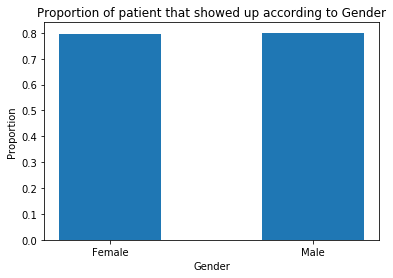

In [30]:
#plot bar
proportions = [female_showed_up, male_showed_up]
plt.bar([1,2], proportions, width=0.5)
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks([1, 2], ['Female', 'Male'])
plt.title('Proportion of patient that showed up according to Gender');

Since the above bar chart tells us that females and males both are most likely to show up so gender is not associated with not showing up for an appoitment

### SCHOLARSHIP VS NO SHOW

In [31]:
df['scholarship'].value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [32]:
# get counts for patient that enrolled for scholarship
scholarship_counts = df.groupby(['scholarship', 'no-show']).count()['age']
scholarship_counts

scholarship  no-show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: age, dtype: int64

In [33]:
# get proportions of patients that showed up who has enrolled for scholarship - by dividing scholarship counts by total # of patient enrolled for scholarship
not_enrolled_scholarship_showed_up = scholarship_counts[0, 'No'] / df['scholarship'].value_counts()[0]
enrolled_scholarship_showed_up = scholarship_counts[1, 'No'] / df['scholarship'].value_counts()[1]

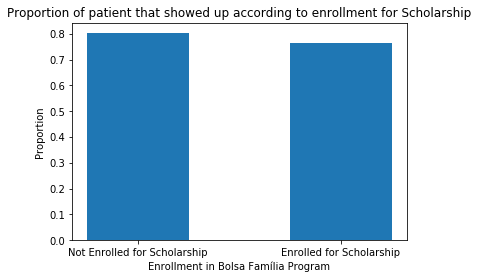

In [34]:
#plot bars
proportions = [not_enrolled_scholarship_showed_up, enrolled_scholarship_showed_up]
plt.bar([1,2], proportions, width=0.5)
plt.xlabel('Enrollment in Bolsa Família Program')
plt.ylabel('Proportion')
plt.xticks([1, 2], ['Not Enrolled for Scholarship', 'Enrolled for Scholarship'])
plt.title('Proportion of patient that showed up according to enrollment for Scholarship');

From the above bar chart we see that patient who are not enrolled in Bolsa Família Program are more likely to show up than the patients who are not enrolled to that program

### SMS RECEIVED VS NO SHOW

In [35]:
# get counts for patient that received a SMS reminder for the appointment
sms_received_counts = df.groupby(['sms_received', 'no-show']).count()['age']
sms_received_counts

sms_received  no-show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: age, dtype: int64

In [36]:
# get proportions of patients that showed up who received a SMS reminder - by dividing sms received counts by total # of patients who received a SMS
sms_not_received_showed_up = sms_received_counts[0, 'No'] / df['sms_received'].value_counts()[0]
sms_received_showed_up = sms_received_counts[1, 'No'] / df['sms_received'].value_counts()[1]

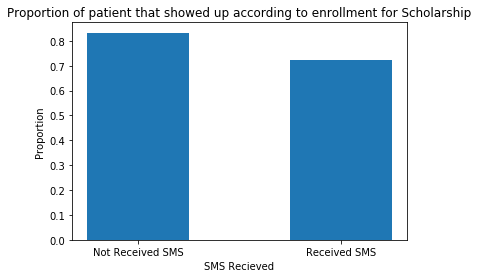

In [37]:
#plot bar
proportions = [sms_not_received_showed_up, sms_received_showed_up]
plt.bar([1,2], proportions, width=0.5)
plt.xlabel('SMS Recieved')
plt.ylabel('Proportion')
plt.xticks([1, 2], ['Not Received SMS', 'Received SMS'])
plt.title('Proportion of patient that showed up according to enrollment for Scholarship');

From the above bar chart we see that patients who did not recieved an sms reminder are more likely to show up for the appoitment than the patients who did received a SMS reminder.

<a id='conclusions'></a>
## Conclusions

1) From the above statistical analysis it is clear that there are already more chances of patients showing up when they have made an appoitnment but because of the lack of inforamtion of various values in many columns it is very hard to predict whether who is not going to show up.

2) It is strange that patient who are enrolled in Bolsa Família Program are less to show up than the patients who are not.

3) Also patients who did not receive SMS reminder are more likely to show up than patient who did received SMS reminders.

4) Patients with more age are more likely to show up for an appoitnment.